<a href="https://colab.research.google.com/github/Canchili/-/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas seaborn scikit-learn

# Домашнее задание 4

1. Преобразовать датасет (процессинг категориальных признаков, копия данных в df_not_processed, scale датасета)
2. Сделать k-means кластеризацию (записать cluster в df_not_processed, вывести статистику, графики. попробовать объяснить принцип кластеризации), оценить метриками, вывести результат
3. Подобрать оптимальное число кластеров с помощью "метод локтя", вывести статистику, графики, метрики, объяснить результат
4. Сделать DBSSCAN кластеризацию, подобрать оптимальные параметры, посчитать метрики, вывести статистику, объяснить результат
5. Ответить на вопрос - какой из методов кластеризации больше подходит для вашего датасета

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

In [ ]:

df = pd.read_csv('Customers.csv')

In [ ]:
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [ ]:
#заполняем пропуски
from sklearn.impute import SimpleImputer

imputer_cat = SimpleImputer(strategy='most_frequent')

imputed = imputer_cat.fit_transform(df[['Profession']])

df['Profession'] = pd.Series(imputed.flatten(), index=df.index)
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64


In [ ]:
df["Gender"] = df["Gender"].astype("category")
df['Profession'] = df['Profession'].astype('category')

In [ ]:
print(df.dtypes)

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income ($)            int64
Spending Score (1-100)       int64
Profession                category
Work Experience              int64
Family Size                  int64
dtype: object


In [ ]:
category_columns: list[str] = df.select_dtypes(include=['category']).columns # собираем колонки помеченные как category

# Применяем One-Hot Encoding
df = pd.get_dummies(df, columns=category_columns, drop_first=True)

In [ ]:
print(df.dtypes)


CustomerID                  int64
Age                         int64
Annual Income ($)           int64
Spending Score (1-100)      int64
Work Experience             int64
Family Size                 int64
Gender_Male                  bool
Profession_Doctor            bool
Profession_Engineer          bool
Profession_Entertainment     bool
Profession_Executive         bool
Profession_Healthcare        bool
Profession_Homemaker         bool
Profession_Lawyer            bool
Profession_Marketing         bool
dtype: object


In [ ]:
df_not_processed = df.copy() # датасет для анализа

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Выбираем числовые признаки
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Инициализируем scaler
scaler = StandardScaler()

# Применяем нормализацию
df[numeric_features] = scaler.fit_transform(df[numeric_features])


In [ ]:
df

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Male,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,-1.731185,-1.054089,-2.093501,-0.428339,-0.791207,0.117497,True,False,False,False,False,True,False,False,False
1,-1.729453,-0.983723,-1.656133,1.075546,-0.281162,-0.390051,True,False,True,False,False,False,False,False,False
2,-1.727721,-1.018906,-0.540845,-1.609962,-0.791207,-1.405148,False,False,True,False,False,False,False,False,False
3,-1.725989,-0.913356,-1.131292,0.932319,-1.046230,-0.897599,False,False,False,False,False,False,False,True,False
4,-1.724257,-0.631891,-1.590528,-0.392532,-0.536185,1.132594,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.724257,0.775438,1.610720,-0.392532,0.993950,1.640142,False,False,False,False,False,False,False,False,False
1996,1.725989,1.479103,-0.821679,-0.678986,0.738928,1.640142,False,True,False,False,False,False,False,False,False
1997,1.727721,1.338370,-0.432356,-1.323508,1.248972,-0.897599,True,False,False,False,False,True,False,False,False
1998,1.729453,0.986538,1.560904,-1.681576,0.738928,-0.897599,True,False,False,False,True,False,False,False,False


**K-means**

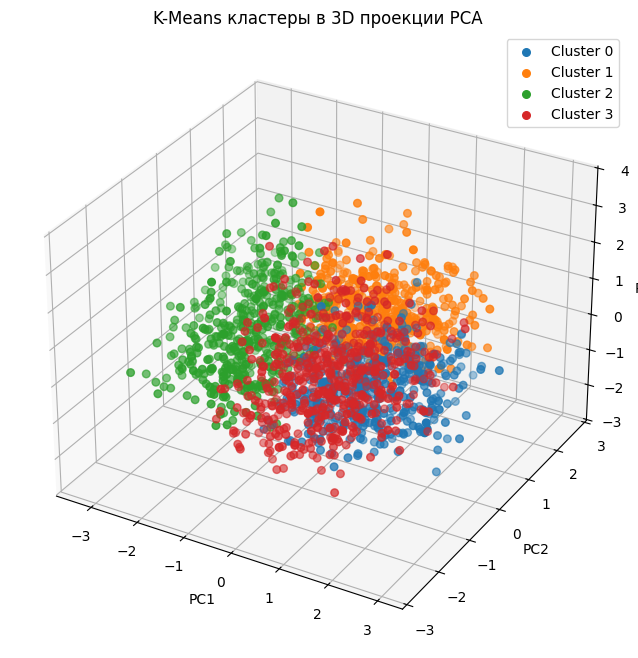

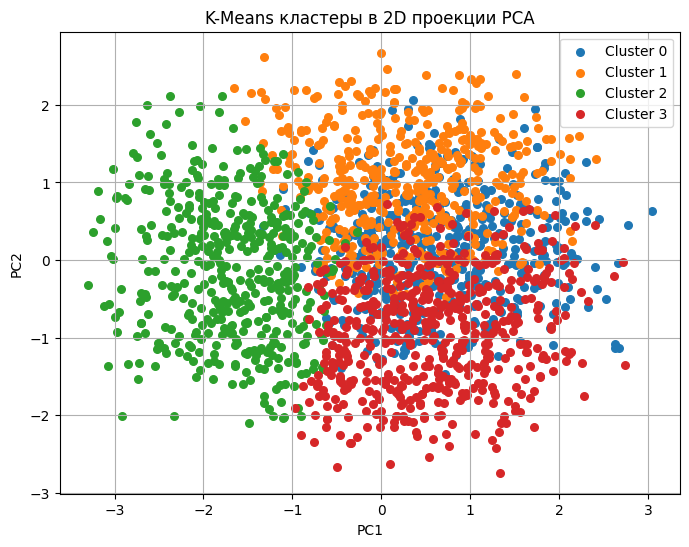

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Male,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
cluster,,,,,,,,,,,,,,,
0,0.37,0.89,0.22,0.71,-0.11,0.45,0.39,0.07,0.10,0.14,0.07,0.17,0.02,0.06,0.04
1,0.27,0.58,0.19,-0.97,0.09,-0.23,0.41,0.08,0.10,0.12,0.07,0.16,0.04,0.07,0.04
2,-1.15,-0.34,-1.06,0.04,-0.25,-0.51,0.40,0.09,0.09,0.09,0.08,0.16,0.03,0.08,0.04
3,0.40,-1.00,0.53,0.21,0.23,0.23,0.43,0.08,0.07,0.11,0.08,0.18,0.03,0.07,0.05


In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
# Обучаем K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df)

# Копируем исходный DataFrame
df_cluster = df.copy()

# Добавляем колонку с номерами кластеров
df_cluster['cluster'] = clusters


# Средние значения по каждому кластеру
cluster_means = df_cluster.groupby('cluster').mean()

# PCA для 3D проекции
pca_3d = PCA(n_components=3, random_state=42)
X_pca_3d = pca_3d.fit_transform(df)

# Визуализация 3D кластеров
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for lab in np.unique(clusters):
    mask = clusters == lab
    ax.scatter(X_pca_3d[mask, 0], X_pca_3d[mask, 1], X_pca_3d[mask, 2], s=30, label=f'Cluster {lab}')
ax.set_title('K-Means кластеры в 3D проекции PCA')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

# PCA для 2D проекции
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(df)

# Визуализация 2D кластеров
plt.figure(figsize=(8, 6))
for lab in np.unique(clusters):
    mask = clusters == lab
    plt.scatter(X_pca_2d[mask, 0], X_pca_2d[mask, 1], s=30, label=f'Cluster {lab}')
plt.title('K-Means кластеры в 2D проекции PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()


cluster_means.round(2)




Значение около 0 — признак близок к среднему по всей выборке.

Значение положительное — признак выше среднего; чем больше число, тем сильнее отклонение вверх.

Значение отрицательное — признак ниже среднего; чем меньше число, тем сильнее отклонение вниз.

Кластер 0

Возраст (Age), Spending Score (активность трат), Family Size выше остальных кластеров и выше среднего.

Это, вероятно, взрослые, семейные клиенты с активными тратами .

кластер 1

Средние возраст и доход ниже, Spending Score и Work Experience относительно низкие.

Молодые специалисты с небольшим опытом, умеренной активностью в тратах.

Кластер 2

Значения по возрасту, доходам и другим метрикам ниже среднего (отрицательные значения).

группа молодых или менее активных клиентов с низкой покупательной способностью.

Кластер 3

высокий возраст, хороший доход



In [ ]:
# Выводим метрики
ss = silhouette_score(df, clusters)
Davies  = davies_bouldin_score(df, clusters)
Calinski  = calinski_harabasz_score(df, clusters)

print(f"Silhouette Score: {ss:.3f}")
print(f"Davies–Bouldin Index: {Davies:.3f}")
print(f"Calinski–Harabasz Index: {Calinski:.1f}")


Silhouette Score: 0.119
Davies–Bouldin Index: 2.176
Calinski–Harabasz Index: 253.5


**Как работает k-means**

1 определение сколько кластеров

2 выбор центроиды(чем ближе точка)

3 расчет растояния

4 замена центроиды

5 повторение этого цикла пока центроиды не перестанут смещатся

**Метрики**

больше лучше

Silhouette Score насколько хорошо каждая точка принадлежит своему кластеру
и насколько далеко она от соседнего кластера.


< лучше

 Davies–Bouldin Index насколько “похожи” кластеры между собой


больше лучше

 Calinski–Harabasz Index Показывает, насколько кластеры плотные и отделённые.


 тоесть можно сказать, что  Silhouette Score показал не очень хороший результат ( 0.119)

 слабая принадлежномть к кластеру и долеко от ср знач

 точка около границы (тк значение чуть больше 0)

 Davies–Bouldin около 2 указывает на среднее качество разделения клатеры сильно пересекаются .

 Calinski–Harabasz около 250 , то есть объекты внутри каждого кластера расположены близко друг к другу,а сами кластеры далеки друг от друга.




---



Метод локтя

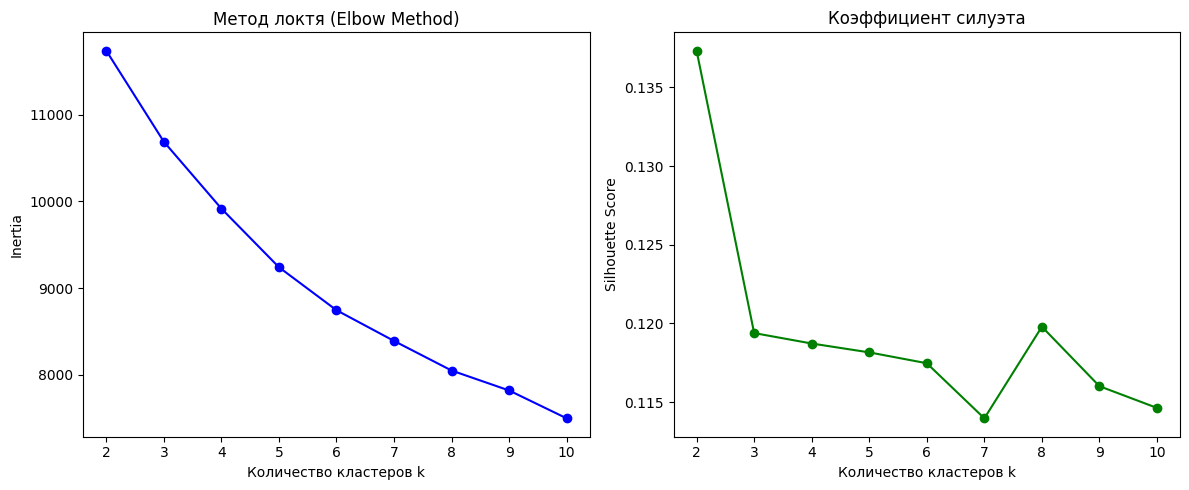

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
silhouettes = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)

    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(df, kmeans.labels_))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertias, 'bo-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Inertia')
plt.title('Метод локтя (Elbow Method)')

plt.subplot(1,2,2)
plt.plot(K, silhouettes, 'go-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Silhouette Score')
plt.title('Коэффициент силуэта')

plt.tight_layout()
plt.show()


Метод локтя (Inertia):

На графике слева видно, что явного выраженного "локтя" нет — линия плавно убывает

Коэффициент силуэта:

максимальное значение силуэт-коэффициента наблюдается при k=2 и быстро падает при увеличении числа кластеров

поэтому выбираем 2 кластера



---



**K-means** с 2 кластерами

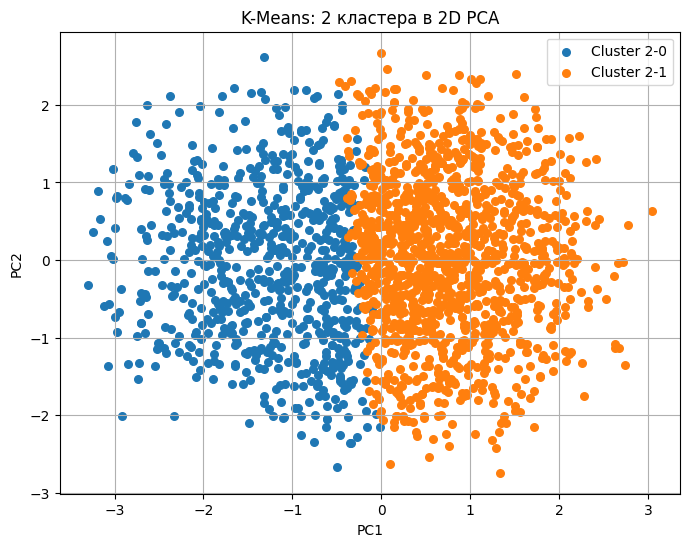

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Male,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
cluster_2,,,,,,,,,,,,,,,
0,-0.87,-0.26,-0.71,-0.03,-0.26,-0.49,0.41,0.08,0.09,0.10,0.07,0.17,0.03,0.08,0.04
1,0.52,0.16,0.42,0.02,0.15,0.30,0.40,0.08,0.09,0.12,0.08,0.17,0.03,0.07,0.04


In [ ]:

kmeans_2 = KMeans(n_clusters=2, random_state=42)
clusters_2 = kmeans_2.fit_predict(df)

df_cluster_2 = df.copy()
df_cluster_2['cluster_2'] = clusters_2
cluster_means_2 = df_cluster_2.groupby('cluster_2').mean()

pca_2d_2 = PCA(n_components=2, random_state=42)  # Можно использовать тот же PCA, если df тот же
X_pca_2d_2 = pca_2d_2.fit_transform(df)

plt.figure(figsize=(8, 6))
for lab in np.unique(clusters_2):
    mask = clusters_2 == lab
    plt.scatter(X_pca_2d_2[mask, 0], X_pca_2d_2[mask, 1], s=30, label=f'Cluster 2-{lab}')
plt.title('K-Means: 2 кластера в 2D PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

cluster_means_2.round(2)

Кластер 0

это, скорее, молодые, менее активные клиенты, малый доход, малая трата меньше обыта

Кластер 1

более старшие люди с большим доходом и активностью как клиента, больше опыта



In [ ]:
# Выводим метрики
ss = silhouette_score(df, clusters_2)
Davies  = davies_bouldin_score(df, clusters_2)
Calinski  = calinski_harabasz_score(df, clusters_2)

print(f"Silhouette Score: {ss:.3f}")
print(f"Davies–Bouldin Index: {Davies:.3f}")
print(f"Calinski–Harabasz Index: {Calinski:.1f}")

Silhouette Score: 0.137
Davies–Bouldin Index: 2.300
Calinski–Harabasz Index: 333.6


**Метрики**

Silhouette Score чуть увеличился, но не значительно точки все также находятся около границы

 Davies–Bouldin так же увеличился но совсем немного, около 2 указывает на среднее качество разделения кластера, сильно пересекаются .

 Calinski–Harabasz тоже увеличился примерно на 100, сейан он около 333 , то есть объекты внутри каждого кластера расположены близко друг к другу,а сами кластеры далеки друг от друга, это хорошо.




---




**DBSCAN**

In [ ]:
from ipywidgets import widgets

eps_slider = widgets.FloatSlider(value=0.5, min=0.1, max=2.0, step=0.1, description='eps:')
min_samples_slider = widgets.IntSlider(value=5, min=1, max=30, step=1, description='min_samples:')

output = widgets.Output()

def run_dbscan(eps, min_samples):
    with output:
        output.clear_output()
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(df)
        df_cluster = df.copy()
        df_cluster['cluster_dbscan'] = clusters

        num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        num_outliers = np.sum(clusters == -1)

        print(f"Параметры: eps={eps}, min_samples={min_samples}")
        print("Количество кластеров (без -1):", num_clusters)
        print("Количество выбросов (cluster = -1):", num_outliers)
        display(df_cluster.groupby('cluster_dbscan').mean().round(2))

# Создаем интерактивный интерфейс
interactive_dbscan = widgets.interactive(run_dbscan, eps=eps_slider, min_samples=min_samples_slider)

display(interactive_dbscan, output)

interactive(children=(FloatSlider(value=0.5, description='eps:', max=2.0, min=0.1), IntSlider(value=5, descrip…

Output()

выбирала
eps 1.7 и min 5  выбросов(41)


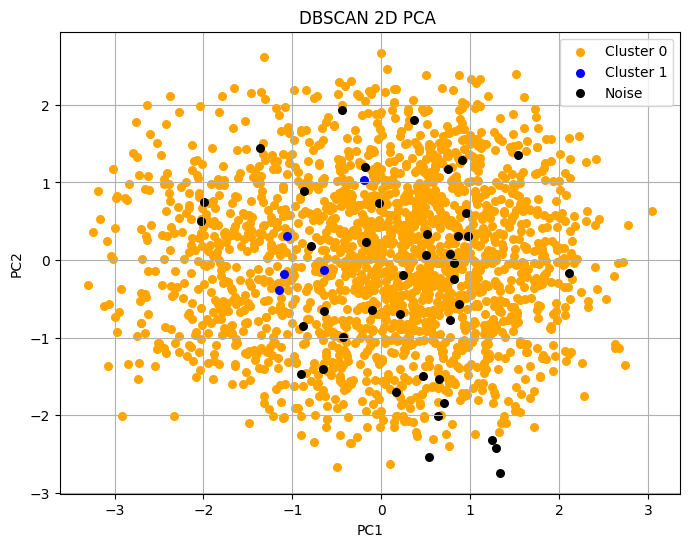


Silhouette Score: 0.171
Davies-Bouldin Index: 1.113
Calinski-Harabasz Index: 8.710


,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Male,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
cluster,,,,,,,,,,,,,,,
-1,-0.63,-0.1,0.08,0.12,1.86,0.34,0.59,0.15,0.10,0.10,0.20,0.07,0.07,0.07,0.10
0,0.02,0.0,-0.00,0.00,-0.05,-0.00,0.40,0.08,0.09,0.12,0.07,0.17,0.03,0.07,0.04
1,-0.92,-0.7,-0.61,-1.31,2.58,-1.00,0.20,0.60,0.00,0.00,0.00,0.00,0.00,0.20,0.00


In [ ]:
# Обучаем DBSCAN с eps=1.7, min_samples=5
dbscan_best = DBSCAN(eps=1.7, min_samples=5)
clusters = dbscan_best.fit_predict(df)

# Добавляем кластеры в DataFrame
df_cluster = df.copy()
df_cluster['cluster'] = clusters

# Применяем PCA для 2D проекции
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df)

plt.figure(figsize=(8, 6))

unique_labels = set(clusters)
for label in unique_labels:
    mask = clusters == label
    if label == -1:
        # Выбросы черные
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1], s=30, color='black', label='Noise')
    elif label == 0:
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1], s=30, color='orange', label='Cluster 0')
    elif label == 1:
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1], s=30, color='blue', label='Cluster 1')
    else:
        # Если больше 2 кластеров, можно добавлять свои цвета
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1], s=30, label=f'Cluster {label}')

plt.title('DBSCAN 2D PCA ')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

# Убираем выбросы (-1) перед расчетом метрик
mask = clusters != -1
df_valid = df[mask]  # используем исходные данные для метрик
labels_valid = clusters[mask]

if len(set(labels_valid)) > 1:  # должно быть хотя бы 2 кластера
    sil = silhouette_score(df_valid, labels_valid)
    dbi = davies_bouldin_score(df_valid, labels_valid)
    chi = calinski_harabasz_score(df_valid, labels_valid)
    print(f"\nSilhouette Score: {sil:.3f}")
    print(f"Davies-Bouldin Index: {dbi:.3f}")
    print(f"Calinski-Harabasz Index: {chi:.3f}")
else:
    print("Недостаточно кластеров для расчёта метрик.")


cluster = df_cluster.groupby('cluster').mean()
cluster.round(2)

**Метрики**

Silhouette Score находятся около границы, показатель лучше чем k-means но не сильно

 Davies–Bouldin значение среднее, кластеры пересикаются но не сильно

 Calinski–Harabasz низкое значение, объекты внутри каждого кластера расположены далеко друг от другу,а сами кластеры близко друг к друга.



Кластер -1 (выбросы):

Возраст, доход, и Spending Score очень близки к среднему (около 0), но Work Experience значительно выше (1.86).

Кластер 0:

Все значения практически нейтральны (близки к нулю, то есть среднему): возраст, доход, размер семьи.

значения такие, как будто кластер это выбросы

Кластер 1:

Возраст, доход, Spending Score сильно ниже среднего (-0.7, -0.61), Spending Score еще ниже (-1.31).

Опыт заметно выше (2.58),


Это сегмент относительно молодых клиентов с низким  доходом, большим опытом





---
**k-means и DBSCAN**

k-means

Silhouette Score: 0.137  -

Davies–Bouldin Index: 2.300 -

Calinski–Harabasz Index: 333.6 +

DBSCAN

Silhouette Score: 0.171 +

Davies-Bouldin Index: 1.113 +

Calinski-Harabasz Index: 8.710 +


по метрикам выигрывает DBSCAN, но если смотреть на среднее и разделение кластеров, то конечно лучше k-means, но смог хоть и не идеально но разделить кластеры, визуально и в средних значениях это видно.
